In [1]:
wt = "DISGINASVVNIQKEIDRLNEVAKNLNESLI"

# We'll start by defining reasonable sets of amino acids:
polar_noCY = set("NQST")
polar_noC = set("NQSTY")
polar_orG_noC = set("GNQSTY")
polar_oracidic_noC = set("DENQSTY")
polar_small_noC = set("ST")
small_noCGP = set("AST")
neutral_noCGW = set("AFILMNQSTVY")
basic = set("HKR")
basic_large = set("KR")
acidic = set("DE")
hydrophobic_noGPW = set("AFILMV")
hydrophobic_large = set("FILMVW")
hydrophobic_large_noW = set("FILMV")
hydrophobic_small_noGP = set("AV")
polar_oracidic_orbasic_noC = set("DEHKNQRSTY")

In [2]:
import itertools as it

# Now we'll make a list of the reasonable amino acids for each site
# by copying the sets, so we can modify the elements individually:
possible_mutations = [acidic.copy(),
                      hydrophobic_large_noW.copy(),
                      polar_noCY.copy(),
                      polar_orG_noC.copy(),
                      hydrophobic_large_noW.copy(),
                      polar_oracidic_noC.copy(),
                      hydrophobic_small_noGP.copy(),
                      polar_small_noC.copy(),
                      polar_oracidic_noC.copy(),
                      hydrophobic_noGPW.copy(),
                      polar_oracidic_noC.copy(),
                      hydrophobic_large_noW.copy(),
                      polar_noCY.copy(),
                      polar_oracidic_orbasic_noC.copy(),
                      set("E"),
                      hydrophobic_large_noW.copy(),
                      polar_oracidic_noC.copy(),
                      basic_large.copy(),
                      hydrophobic_large.copy(),
                      polar_noC.copy(),
                      acidic.copy(),
                      hydrophobic_noGPW.copy(),
                      small_noCGP.copy(),
                      basic.copy(),
                      polar_oracidic_noC.copy(),
                      hydrophobic_large.copy(),
                      polar_oracidic_noC.copy(),
                      acidic.copy(),
                      small_noCGP.copy(),
                      neutral_noCGW.copy(),
                      hydrophobic_large.copy()]

# We'll discard the wild-type amino acid from the set of
# possible mutations at each site:
for i, char in enumerate(wt):
  possible_mutations[i].discard(char)
print(possible_mutations)

mutation_sites = list(range(len(wt)))
mutation_sites.remove(14) # no mutations considered at GLU-only position

[{'E'}, {'M', 'V', 'L', 'F'}, {'Q', 'T', 'N'}, {'Q', 'N', 'Y', 'S', 'T'}, {'M', 'V', 'L', 'F'}, {'Q', 'T', 'Y', 'S', 'E', 'D'}, {'V'}, {'T'}, {'Q', 'N', 'T', 'Y', 'S', 'E', 'D'}, {'M', 'A', 'I', 'L', 'F'}, {'Q', 'T', 'Y', 'S', 'E', 'D'}, {'M', 'V', 'L', 'F'}, {'S', 'T', 'N'}, {'Q', 'Y', 'S', 'D', 'N', 'R', 'E', 'H', 'T'}, set(), {'M', 'V', 'L', 'F'}, {'Q', 'N', 'T', 'Y', 'S', 'E'}, {'K'}, {'M', 'W', 'I', 'V', 'F'}, {'Q', 'Y', 'S', 'T'}, {'D'}, {'M', 'A', 'I', 'L', 'F'}, {'S', 'T'}, {'R', 'H'}, {'Q', 'T', 'Y', 'S', 'E', 'D'}, {'M', 'W', 'I', 'V', 'F'}, {'Q', 'T', 'Y', 'S', 'E', 'D'}, {'D'}, {'A', 'T'}, {'Q', 'V', 'T', 'Y', 'S', 'F', 'M', 'A', 'I', 'N'}, {'M', 'W', 'V', 'L', 'F'}]


In [3]:
# Let's define a function to generate all mutants of an arbitrary order:
def generate_mutants(num_mutations = 1):
  sequences = []
  for sites in it.combinations(mutation_sites, num_mutations):
    for mutations in it.product(*[possible_mutations[site] for site in sites]):
      sequence = wt[0:sites[0]]
      for i in range(num_mutations - 1):
        sequence += mutations[i] + wt[sites[i] + 1:sites[i + 1]]
      sequence += mutations[-1] + wt[sites[-1] + 1:]
      sequences.append(sequence)
  return sequences

# We can easily keep all mutants up to order 4 in memory (running on Colab):
print("Stored all " + str(len(generate_mutants(1))) + " single mutants")
print("Stored all " + str(len(generate_mutants(2))) + " double mutants")
print("Stored all " + str(len(generate_mutants(3))) + " triple mutants")
print("Stored all " + str(len(generate_mutants(4))) + " quadruple mutants")

Stored all 124 single mutants
Stored all 7350 double mutants
Stored all 277294 triple mutants
Stored all 7479778 quadruple mutants


In [4]:
import numpy as np

# Here's a function to count the number of mutants of arbitrary order
# without actually generating them:
def count_mutants(num_mutations = 1):
  num_mutants = 0
  for sites in it.combinations(mutation_sites, num_mutations):
    num_mutants += np.product([len(possible_mutations[site]) for site in sites])
  return num_mutants

print("There are " + str(count_mutants(8)) + " mutants with 8 mutations")

There are 361446256260 mutants with 8 mutations


In [5]:
import random

def random_combination(iterable, r): # from itertools documentation
  pool = tuple(iterable)
  n = len(pool)
  indices = sorted(random.sample(range(n), r))
  return tuple(pool[i] for i in indices)

def random_product(*args, repeat = 1): # from itertools documentation
  pools = [tuple(pool) for pool in args] * repeat
  return tuple(random.choice(pool) for pool in pools)

# Now, a function to sample a number of mutants of arbitrary order
# without generating them all. In this case, we are sampling uniformly
# over the sites that are mutated, which means that each mutant is not
# equally probable.
def generate_mutant_sample(num_mutations = 1, num_samples = 1):
    sequences = []
    while len(sequences) < num_samples:
        sites = random_combination(mutation_sites, num_mutations)
        mutations = random_product(*[possible_mutations[site] for site in sites])
        sequence = wt[0:sites[0]]
        for i in range(num_mutations - 1):
            sequence += mutations[i] + wt[sites[i] + 1:sites[i + 1]]
        sequence += mutations[-1] + wt[sites[-1] + 1:]
        if sequence not in sequences:
            sequences.append(sequence)
    return sequences

print("A list of 10 random sequences with 10 mutations:")
print(generate_mutant_sample(10,10))

A list of 10 random sequences with 10 mutations:
['ELSYIYVTVVQINKEIDRLNEVARNLNESAI', 'DISTINVTVVNMNQEIDKLNEAAKNIYESLI', 'EISQINASVVNFSKEIDKLSDFAHNLDESLI', 'DINGINATVVYISKEMTKLSDVAKNLNETLI', 'EISTFNATVVNLQKEMDKLNEVAKNLNDAII', 'DITSINVSVVNIQKEINKLQDVAKYLSEALI', 'DMTGVNASVVNISKEFDRLQELTKNLNETLV', 'EISGVNVSNLNIQKELERLNDVAHNLNESNI', 'EIQGINVSVVDISTEITRLNDVSKNLNESQI', 'DFNGIDASVVNITSEIDRLNELAHNLDDSMI']


Text(0, 0.5, 'number of unique mutants')

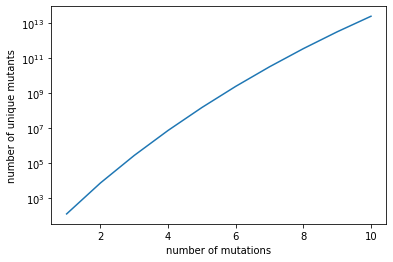

In [6]:
# This cell demonstrates the combinatorial explosion of mutants at high order:
%matplotlib inline
from matplotlib import pyplot as plt

x = np.arange(1, 11)
y = [count_mutants(xval) for xval in x]

plt.plot(x, y)
plt.yscale("log")
plt.xlabel("number of mutations")
plt.ylabel("number of unique mutants")

In [7]:
# FastDesign optimized sequence according to the above constraints:
opt = "DISQIYASYVDIQDEIDKLYEVAKQLEETLL"

# Show which positions are different from WT:
print(wt)
print("".join([str(int(wt[i] == opt[i])) for i in range(len(wt))]))
print(opt)

# Now a function to generate a random sample of hybrids of two sequences,
# with num_seq2 sites from the second sequence:
def generate_hybrid_sample(seq1, seq2, num_seq2 = 1, num_samples = 1):
    diff_pos = []
    for i in range(len(wt)):
        if wt[i] != opt[i]:
            diff_pos.append(i)
    sequences = []
    while len(sequences) < num_samples:
        sites = random_combination(diff_pos, num_seq2)
        sequence = seq1[0:sites[0]]
        for i in range(num_seq2 - 1):
            sequence += seq2[sites[i]] + seq1[sites[i] + 1:sites[i + 1]]
        sequence += seq2[sites[-1]] + seq1[sites[-1] + 1:]
        if sequence not in sequences:
            sequences.append(sequence)
    return sequences

print("\nA list of 10 random hybrids between the wild-type and Rosetta")
print("FastDesign-optimized sequence, with 5 positions from the mutant:")
print(generate_hybrid_sample(wt, opt, 2, 10))

DISGINASVVNIQKEIDRLNEVAKNLNESLI
1110101101011011101011110101010
DISQIYASYVDIQDEIDKLYEVAKQLEETLL

A list of 10 random hybrids between the wild-type and Rosetta
FastDesign-optimized sequence, with 5 positions from the mutant:
['DISGINASVVDIQKEIDRLNEVAKNLNETLI', 'DISGINASVVNIQKEIDKLNEVAKNLNESLL', 'DISGINASYVNIQDEIDRLNEVAKNLNESLI', 'DISGIYASVVNIQKEIDKLNEVAKNLNESLI', 'DISGINASVVNIQKEIDRLNEVAKQLNESLL', 'DISGINASYVNIQKEIDRLNEVAKNLEESLI', 'DISGINASVVDIQKEIDRLNEVAKNLNESLL', 'DISQINASVVNIQDEIDRLNEVAKNLNESLI', 'DISGIYASVVNIQKEIDRLNEVAKQLNESLI', 'DISGINASVVNIQDEIDKLNEVAKNLNESLI']


In [8]:
# Now let's create variants of the above random generation functions that
# also create names for these sequences:
def generate_named_mutant_sample(num_mutations = 1, num_samples = 1):
    sequences = []
    mutation_strings = []
    while len(sequences) < num_samples:
        sites = random_combination(mutation_sites, num_mutations)
        mutations = random_product(*[possible_mutations[site] for site in sites])
        sequence = wt[0:sites[0]]
        for i in range(num_mutations - 1):
            sequence += mutations[i] + wt[sites[i] + 1:sites[i + 1]]
        sequence += mutations[-1] + wt[sites[-1] + 1:]
        if sequence not in sequences:
            sequences.append(sequence)
            mutation_strings.append('+'.join([''.join([wt[sites[i]],
                                                       str(sites[i] + 1168),
                                                       mutations[i]]) \
                                              for i in range(num_mutations)]))
    return sequences, mutation_strings


def generate_named_hybrid_sample(seq1, seq2, num_seq2 = 1, num_samples = 1):
    diff_pos = []
    for i in range(len(wt)):
        if wt[i] != opt[i]:
            diff_pos.append(i)
    sequences = []
    mutation_strings = []
    while len(sequences) < num_samples:
        sites = random_combination(diff_pos, num_seq2)
        sequence = seq1[0:sites[0]]
        for i in range(num_seq2 - 1):
            sequence += seq2[sites[i]] + seq1[sites[i] + 1:sites[i + 1]]
        sequence += seq2[sites[-1]] + seq1[sites[-1] + 1:]
        if sequence not in sequences:
            sequences.append(sequence)
            mutation_strings.append('+'.join([''.join([seq1[sites[i]],
                                                       str(sites[i] + 1168),
                                                       seq2[sites[i]]]) \
                                              for i in range(num_seq2)]))
    return sequences, mutation_strings


def format_fasta(sequences, mutation_strings, header_note = ""):
    if header_note == "":
        return '\n'.join(['>' + mutation_strings[i] + '\n' + sequences[i]
                          for i in range(len(sequences))])
    else:
        return '\n'.join(['>' + mutation_strings[i] + '|' + header_note + \
                          '\n' + sequences[i] for i in range(len(sequences))])


In [9]:
# This cell generates the sequences to be ordered on 2020-08-03
random.seed(2)

print(format_fasta(*generate_named_mutant_sample(2, 160), "random_double"))
print(format_fasta(*generate_named_mutant_sample(3, 80), "random_triple"))
print(format_fasta(*generate_named_mutant_sample(4, 40), "random_quadruple"))
print(format_fasta(*generate_named_hybrid_sample(wt, opt, 2, 20), "random_hybrid_double"))
print(format_fasta([opt], ["rosetta_fastdesign_optimized"]))

>I1169M+S1196A|random_double
DMSGINASVVNIQKEIDRLNEVAKNLNEALI
>I1179V+E1195D|random_double
DISGINASVVNVQKEIDRLNEVAKNLNDSLI
>V1176N+E1188D|random_double
DISGINASNVNIQKEIDRLNDVAKNLNESLI
>N1187Y+A1190T|random_double
DISGINASVVNIQKEIDRLYEVTKNLNESLI
>Q1180N+V1189F|random_double
DISGINASVVNINKEIDRLNEFAKNLNESLI
>I1179F+L1186F|random_double
DISGINASVVNFQKEIDRFNEVAKNLNESLI
>V1176Q+L1197Q|random_double
DISGINASQVNIQKEIDRLNEVAKNLNESQI
>I1179L+I1183F|random_double
DISGINASVVNLQKEFDRLNEVAKNLNESLI
>K1181T+L1197T|random_double
DISGINASVVNIQTEIDRLNEVAKNLNESTI
>N1173T+L1186W|random_double
DISGITASVVNIQKEIDRWNEVAKNLNESLI
>D1168E+N1173T|random_double
EISGITASVVNIQKEIDRLNEVAKNLNESLI
>I1172L+R1185K|random_double
DISGLNASVVNIQKEIDKLNEVAKNLNESLI
>I1183F+L1197I|random_double
DISGINASVVNIQKEFDRLNEVAKNLNESII
>L1193I+I1198F|random_double
DISGINASVVNIQKEIDRLNEVAKNINESLF
>I1179F+S1196A|random_double
DISGINASVVNFQKEIDRLNEVAKNLNEALI
>Q1180N+L1193V|random_double
DISGINASVVNINKEIDRLNEVAKNVNESLI
>R1185K+V1189L|random_do